In [38]:
import pandas as pd
df= pd.read_csv("C:/Users/USER/Downloads/user-garbage_data_entity_202506101226.csv")
df

,id,application_id,battery_level,bin_level,created_on,data_publish_toiudx,date_time,device_addr,device_id,device_name,device_position,device_type,distance,latitude,longitude,position_state,source,temperature
0,1,lora-00001,52.0,12.0,2024-12-23 16:24:52.319,False,2024-12-23 16:24:52.319,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,88.0,17.239699,78.474807,NaN,NaN,21.7
1,2,lora-00001,52.0,22.0,2024-12-23 16:25:52.155,True,2024-12-23 16:25:52.155,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,78.0,17.239699,78.474807,NaN,NaN,21.7
2,3,lora-00001,52.0,17.0,2024-12-23 16:26:33.177,True,2024-12-23 16:26:33.177,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,83.0,17.239699,78.474807,NaN,NaN,21.7
3,4,lora-00001,52.0,18.0,2024-12-23 16:32:11.188,True,2024-12-23 16:32:11.188,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,82.0,17.239699,78.474807,NaN,NaN,21.7
4,5,lora-00001,52.0,22.0,2024-12-23 16:33:11.109,True,2024-12-23 16:33:11.109,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,78.0,17.239699,78.474807,NaN,NaN,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,15397,lora-00002,52.0,27.0,2025-04-09 18:12:42.378,NaN,2025-04-09 18:12:42.378,1205,70B3D57ED006ADE4,lora-node-03,15.0,Smart-Garbage-Bin-002,73.0,18.531619,73.810051,Normal,NaN,10.3
13949,15398,lora-00001,52.0,75.0,2025-04-09 18:13:33.282,NaN,2025-04-09 18:13:33.282,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,25.0,18.532108,73.809987,NaN,NaN,10.3
13950,15399,lora-00002,52.0,35.0,2025-04-09 18:13:42.375,NaN,2025-04-09 18:13:42.375,1205,70B3D57ED006ADE4,lora-node-03,15.0,Smart-Garbage-Bin-002,65.0,18.531619,73.810051,Normal,NaN,10.3
13951,15400,lora-00001,52.0,82.0,2025-04-09 18:14:33.295,NaN,2025-04-09 18:14:33.295,260BE023,70B3D57ED00698FC,lora-node-02,0.0,Smart-Garbage-Bin-001,18.0,18.532108,73.809987,NaN,NaN,10.3


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [40]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics for numerical columns
print(df.describe())

# Check for duplicate rows
print(df.duplicated().sum())


   id application_id  battery_level  bin_level               created_on  \
0   1     lora-00001           52.0       12.0  2024-12-23 16:24:52.319   
1   2     lora-00001           52.0       22.0  2024-12-23 16:25:52.155   
2   3     lora-00001           52.0       17.0  2024-12-23 16:26:33.177   
3   4     lora-00001           52.0       18.0  2024-12-23 16:32:11.188   
4   5     lora-00001           52.0       22.0  2024-12-23 16:33:11.109   

  data_publish_toiudx                date_time device_addr         device_id  \
0               False  2024-12-23 16:24:52.319    260BE023  70B3D57ED00698FC   
1                True  2024-12-23 16:25:52.155    260BE023  70B3D57ED00698FC   
2                True  2024-12-23 16:26:33.177    260BE023  70B3D57ED00698FC   
3                True  2024-12-23 16:32:11.188    260BE023  70B3D57ED00698FC   
4                True  2024-12-23 16:33:11.109    260BE023  70B3D57ED00698FC   

    device_name  device_position            device_type  distance   

In [41]:
# Impute missing values with the median
numerical_cols = ['battery_level', 'bin_level', 'distance', 'latitude', 'longitude', 'temperature']
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


In [42]:
df['created_on'] = pd.to_datetime(df['created_on'])
df['date_time'] = pd.to_datetime(df['date_time'])

In [43]:
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['month'] = df['date_time'].dt.month


In [44]:
df.drop_duplicates(inplace=True)


In [45]:
# Label Encoding for binary categorical variables
encoder = LabelEncoder()
df['data_publish_toiudx'] = encoder.fit_transform(df['data_publish_toiudx'])

# One-Hot Encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=['application_id', 'device_name', 'device_position', 'device_type', 'position_state', 'source'], drop_first=True)


In [46]:
# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [47]:
df.drop(columns=['id', 'application_id_lora-00002', 'device_addr'], inplace=True)  # if not needed


In [48]:
print(df.columns.tolist())


['battery_level', 'bin_level', 'created_on', 'data_publish_toiudx', 'date_time', 'device_id', 'distance', 'latitude', 'longitude', 'temperature', 'hour', 'day', 'weekday', 'month', 'device_name_lora-node-03', 'device_position_15.0', 'device_type_Smart-Garbage-Bin-002']


In [49]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   battery_level                      13953 non-null  float64       
 1   bin_level                          13953 non-null  float64       
 2   created_on                         13953 non-null  datetime64[ns]
 3   data_publish_toiudx                13953 non-null  int32         
 4   date_time                          13953 non-null  datetime64[ns]
 5   device_id                          13953 non-null  object        
 6   distance                           13953 non-null  float64       
 7   latitude                           13953 non-null  float64       
 8   longitude                          13953 non-null  float64       
 9   temperature                        13953 non-null  float64       
 10  hour                              

C:\Users\USER\AppData\Local\Temp\ipykernel_15068\741738344.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['position_state'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15068\741738344.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

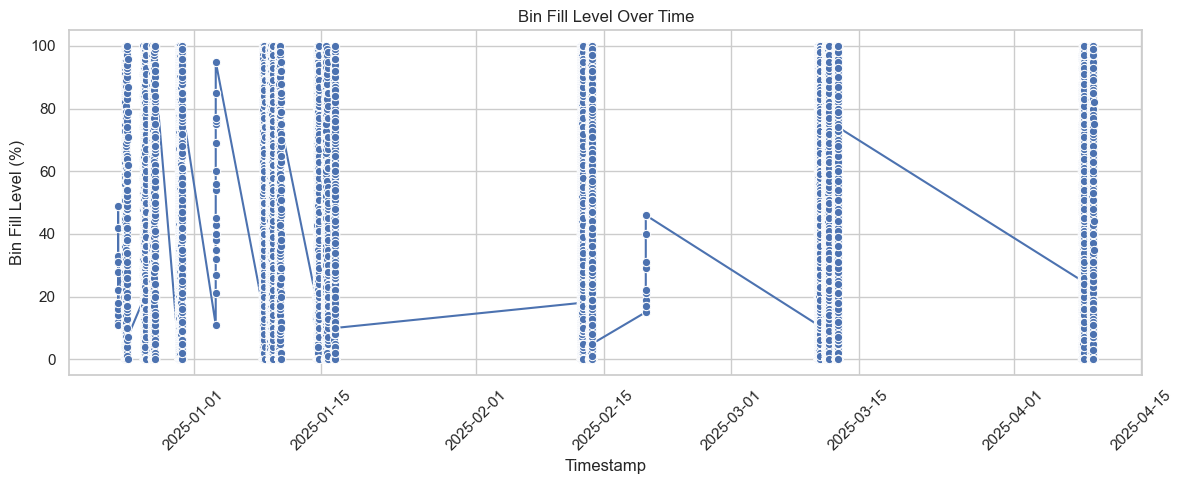

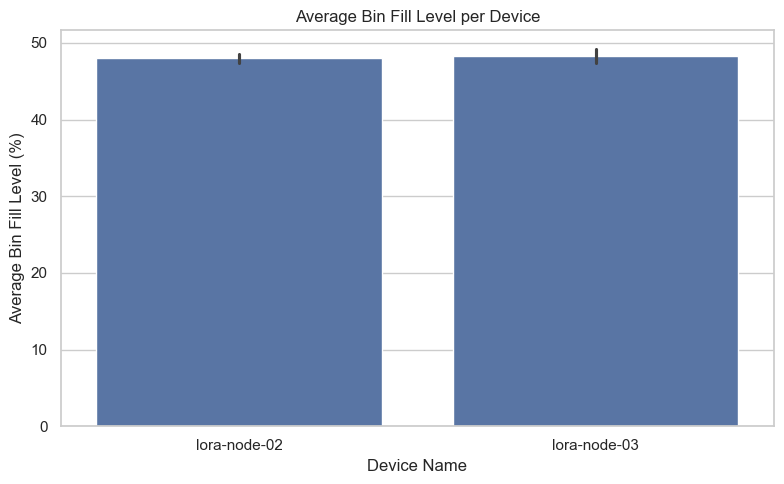

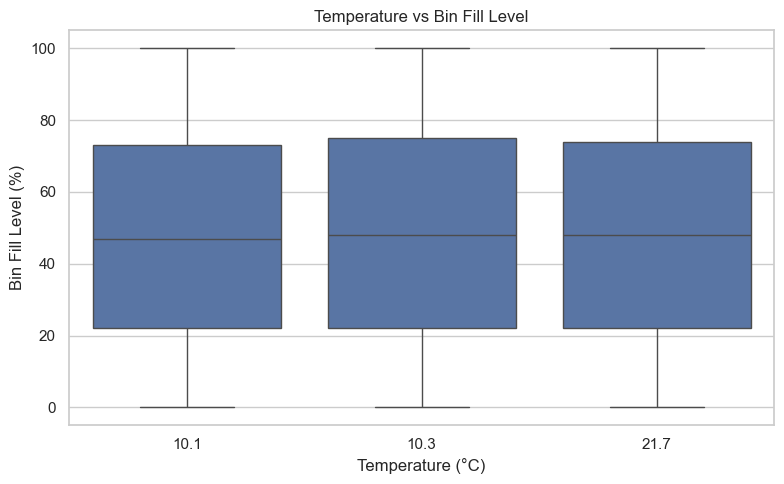

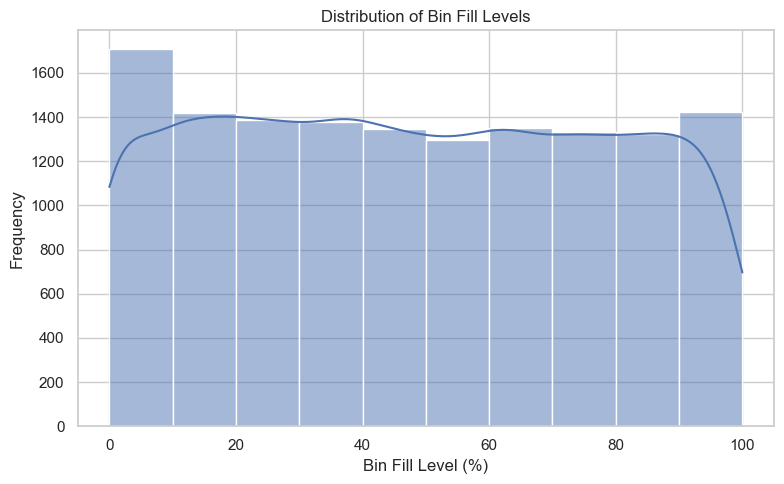

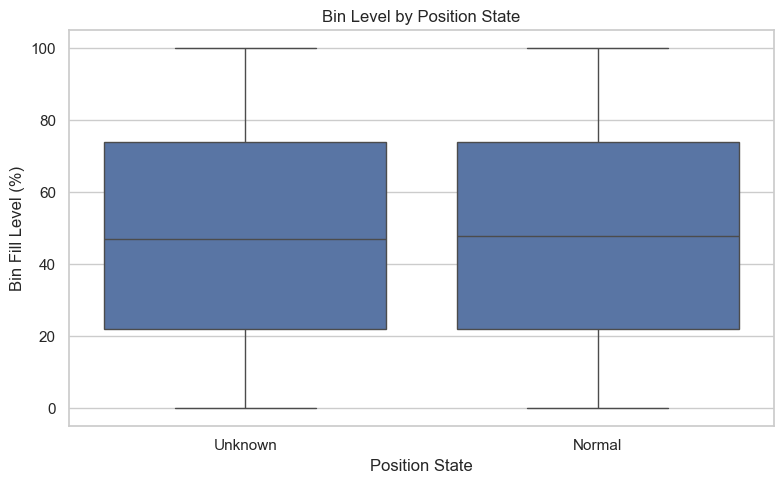

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/USER/Downloads/user-garbage_data_entity_202506101226.csv")  # Replace with your actual CSV file path

# Convert datetime
df['created_on'] = pd.to_datetime(df['created_on'], errors='coerce')
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Handle missing values
df['position_state'].fillna('Unknown', inplace=True)
df['source'].fillna('Unknown', inplace=True)

# Extract time features
df['hour'] = df['created_on'].dt.hour
df['date'] = df['created_on'].dt.date

# Set seaborn style
sns.set(style='whitegrid')

# Plot 1: Bin Level Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x='created_on', y='bin_level', data=df, marker='o')
plt.title('Bin Fill Level Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bin Fill Level (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average Bin Level per Device
plt.figure(figsize=(8, 5))
sns.barplot(x='device_name', y='bin_level', data=df, estimator=np.mean)
plt.title('Average Bin Fill Level per Device')
plt.ylabel('Average Bin Fill Level (%)')
plt.xlabel('Device Name')
plt.tight_layout()
plt.show()

# Plot 3: Temperature vs Bin Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='temperature', y='bin_level', data=df)
plt.title('Temperature vs Bin Fill Level')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bin Fill Level (%)')
plt.tight_layout()
plt.show()

# Plot 4: Bin Level Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['bin_level'], bins=10, kde=True)
plt.title('Distribution of Bin Fill Levels')
plt.xlabel('Bin Fill Level (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 5: Bin Level by Position State
plt.figure(figsize=(8, 5))
sns.boxplot(x='position_state', y='bin_level', data=df)
plt.title('Bin Level by Position State')
plt.xlabel('Position State')
plt.ylabel('Bin Fill Level (%)')
plt.tight_layout()
plt.show()


In [51]:
print("\n📌 Basic Information:")
print(df.info())



📌 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   13953 non-null  int64         
 1   application_id       13953 non-null  object        
 2   battery_level        13953 non-null  float64       
 3   bin_level            13953 non-null  float64       
 4   created_on           13953 non-null  datetime64[ns]
 5   data_publish_toiudx  5901 non-null   object        
 6   date_time            13953 non-null  datetime64[ns]
 7   device_addr          13953 non-null  object        
 8   device_id            13953 non-null  object        
 9   device_name          13953 non-null  object        
 10  device_position      13953 non-null  float64       
 11  device_type          13953 non-null  object        
 12  distance             13953 non-null  float64       
 13  latitude 

In [52]:
print("\n📊 Summary Statistics:")
print(df.describe())



📊 Summary Statistics:
                 id  battery_level     bin_level  \
count  13953.000000        13953.0  13953.000000   
mean    7807.371175           52.0     48.113309   
min        1.000000           52.0      0.000000   
25%     3489.000000           52.0     22.000000   
50%     8398.000000           52.0     48.000000   
75%    11886.000000           52.0     74.000000   
max    15401.000000           52.0    100.000000   
std     4647.217048            0.0     29.800635   

                          created_on                      date_time  \
count                          13953                          13953   
mean      2025-02-10 16:12:59.335136     2025-02-10 16:12:59.335136   
min       2024-12-23 16:24:52.319000     2024-12-23 16:24:52.319000   
25%    2025-01-09 12:25:56.991000064  2025-01-09 12:25:56.991000064   
50%       2025-02-13 10:11:19.332000     2025-02-13 10:11:19.332000   
75%    2025-03-11 09:36:51.873999872  2025-03-11 09:36:51.873999872   
max       2

In [53]:
print("\n🧮 Unique Values per Column:")
print(df.nunique())



🧮 Unique Values per Column:
id                     13953
application_id             2
battery_level              1
bin_level                101
created_on             13766
data_publish_toiudx        2
date_time              13766
device_addr                2
device_id                  2
device_name                2
device_position            2
device_type                2
distance                 101
latitude                   3
longitude                  3
position_state             2
source                     1
temperature                3
hour                      11
date                      20
dtype: int64


In [54]:
print("\n📈 Correlation Matrix:")
print(df.corr(numeric_only=True))



📈 Correlation Matrix:
                       id  battery_level  bin_level  device_position  \
id               1.000000            NaN   0.000256         0.461452   
battery_level         NaN            NaN        NaN              NaN   
bin_level        0.000256            NaN   1.000000         0.003006   
device_position  0.461452            NaN   0.003006         1.000000   
distance        -0.000256            NaN  -1.000000        -0.003006   
latitude         0.856045            NaN   0.000711         0.366296   
longitude       -0.856045            NaN  -0.000712        -0.366468   
temperature      0.128735            NaN   0.002161         0.101776   
hour             0.232932            NaN   0.003508         0.129185   

                 distance  latitude  longitude  temperature      hour  
id              -0.000256  0.856045  -0.856045     0.128735  0.232932  
battery_level         NaN       NaN        NaN          NaN       NaN  
bin_level       -1.000000  0.000711  -0.

In [55]:
# Set a consistent style for seaborn
sns.set(style='whitegrid')


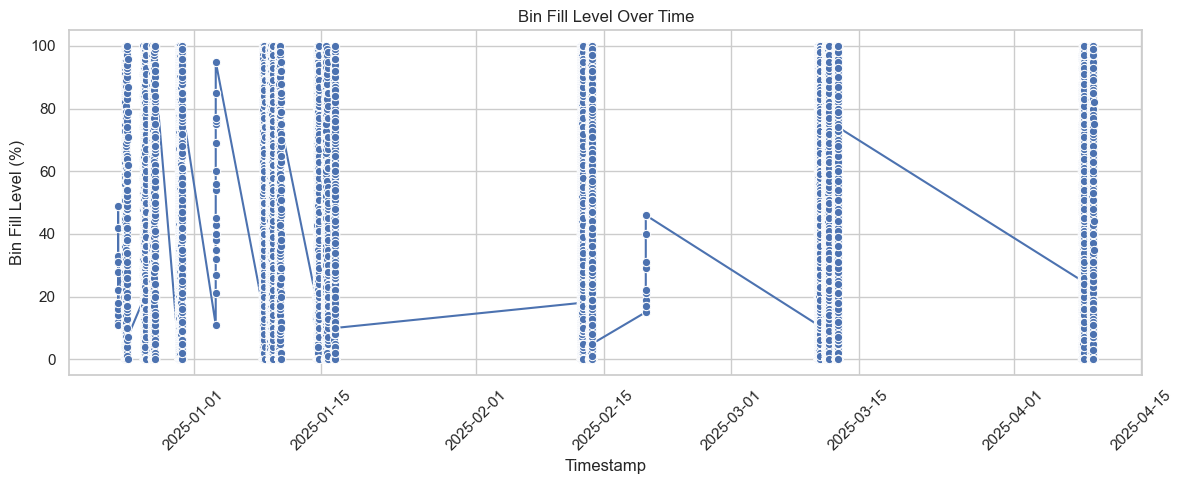

In [56]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='created_on', y='bin_level', data=df, marker='o')
plt.title('Bin Fill Level Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bin Fill Level (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


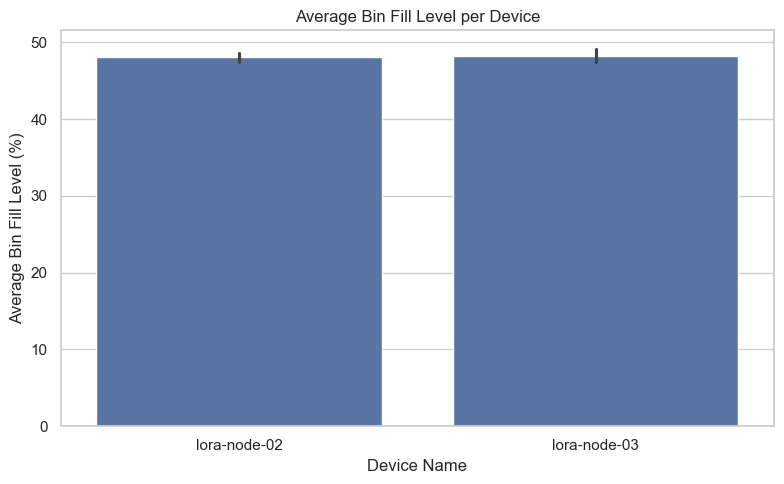

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x='device_name', y='bin_level', data=df, estimator=np.mean)
plt.title('Average Bin Fill Level per Device')
plt.ylabel('Average Bin Fill Level (%)')
plt.xlabel('Device Name')
plt.tight_layout()
plt.show()


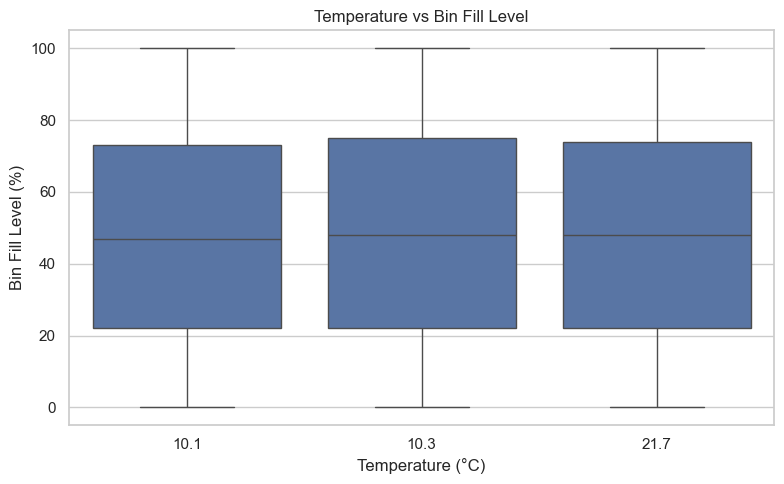

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='temperature', y='bin_level', data=df)
plt.title('Temperature vs Bin Fill Level')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bin Fill Level (%)')
plt.tight_layout()
plt.show()


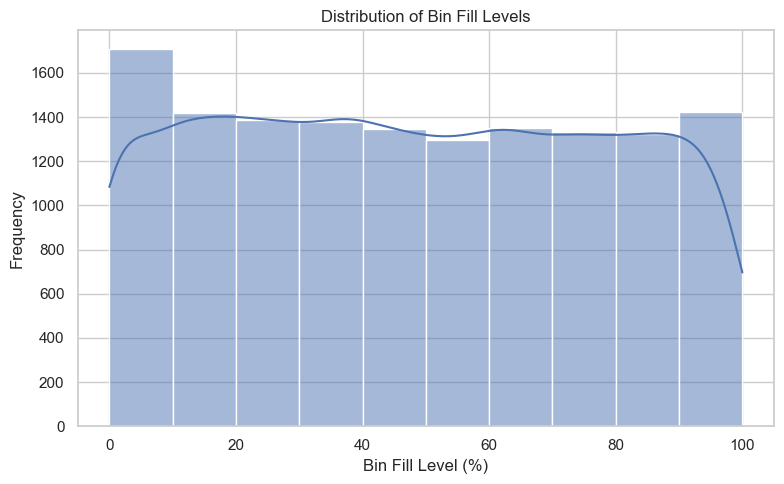

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bin_level'], bins=10, kde=True)
plt.title('Distribution of Bin Fill Levels')
plt.xlabel('Bin Fill Level (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [60]:
df['created_on'] = pd.to_datetime(df['created_on'], errors='coerce')
df = df.sort_values('created_on')

# Filter for one device
device_df = df[df['device_name'] == 'lora-node-02'][['created_on', 'bin_level']]
device_df = device_df.set_index('created_on').resample('H').mean().interpolate()


C:\Users\USER\AppData\Local\Temp\ipykernel_15068\2075330034.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  device_df = device_df.set_index('created_on').resample('H').mean().interpolate()


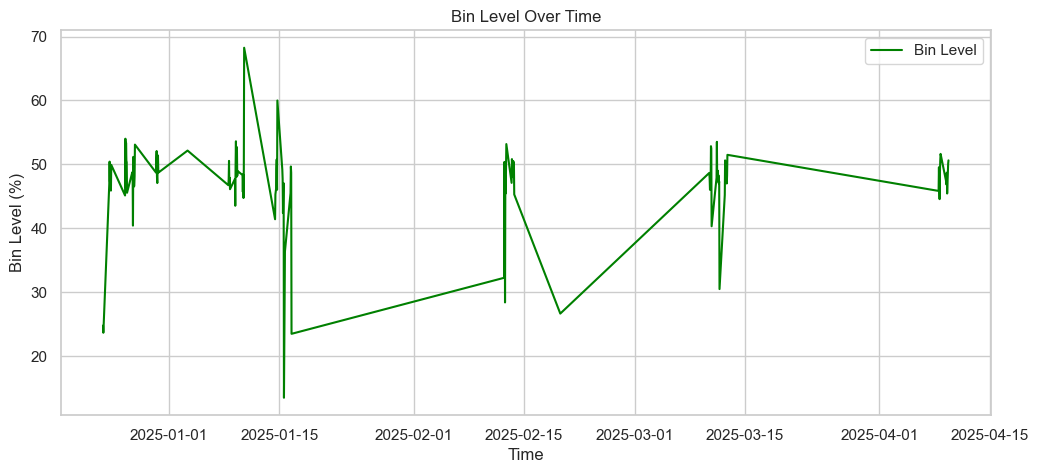

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert 'created_on' to datetime
df['created_on'] = pd.to_datetime(df['created_on'], errors='coerce')

# Step 2: Set 'created_on' as index and resample hourly
ts_df = df.set_index('created_on')[['bin_level']].resample('h').mean().interpolate()

# Step 3: Plot the bin level over time
plt.figure(figsize=(12, 5))
plt.plot(ts_df.index, ts_df['bin_level'], label='Bin Level', color='green')
plt.title('Bin Level Over Time')
plt.xlabel('Time')
plt.ylabel('Bin Level (%)')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [63]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Check stationarity with ADF test
result = adfuller(ts_df['bin_level'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: If p-value > 0.05, data is non-stationary → difference it
ts_stationary = ts_df['bin_level'].diff().dropna()

# Step 3: Fit ARIMA model (p=1, d=1, q=1 as a starting point)
model = sm.tsa.ARIMA(ts_df['bin_level'], order=(1,1,1))
model_fit = model.fit()

# Step 4: Forecast next 24 hours
forecast = model_fit.forecast(steps=24)
print("\nForecast for next 24 hours:")
print(forecast)


ADF Statistic: -1.859847252218723
p-value: 0.3511794397022046

Forecast for next 24 hours:
2025-04-09 19:00:00    50.207471
2025-04-09 20:00:00    50.088811
2025-04-09 21:00:00    50.055747
2025-04-09 22:00:00    50.046535
2025-04-09 23:00:00    50.043968
2025-04-10 00:00:00    50.043252
2025-04-10 01:00:00    50.043053
2025-04-10 02:00:00    50.042998
2025-04-10 03:00:00    50.042982
2025-04-10 04:00:00    50.042978
2025-04-10 05:00:00    50.042977
2025-04-10 06:00:00    50.042976
2025-04-10 07:00:00    50.042976
2025-04-10 08:00:00    50.042976
2025-04-10 09:00:00    50.042976
2025-04-10 10:00:00    50.042976
2025-04-10 11:00:00    50.042976
2025-04-10 12:00:00    50.042976
2025-04-10 13:00:00    50.042976
2025-04-10 14:00:00    50.042976
2025-04-10 15:00:00    50.042976
2025-04-10 16:00:00    50.042976
2025-04-10 17:00:00    50.042976
2025-04-10 18:00:00    50.042976
Freq: h, Name: predicted_mean, dtype: float64


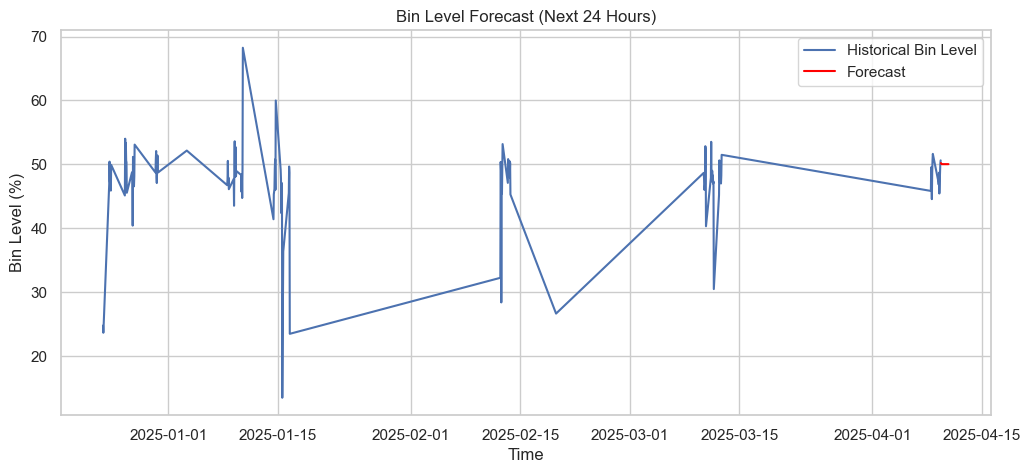

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(ts_df['bin_level'], label='Historical Bin Level')
plt.plot(pd.date_range(start=ts_df.index[-1], periods=25, freq='h')[1:], forecast, label='Forecast', color='red')
plt.title('Bin Level Forecast (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('Bin Level (%)')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
%pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [66]:
import pmdarima as pm

# Run auto_arima to find best p, d, q
stepwise_model = pm.auto_arima(
    ts_df['bin_level'],
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    seasonal=False,  # Set to True if you want to try SARIMA
    stepwise=True,
    trace=True,      # Shows progress
    error_action='ignore',
    suppress_warnings=True
)

print("Best ARIMA model found:", stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9031.177, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9171.091, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9091.364, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9052.377, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9169.216, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8997.341, Time=0.88 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8995.824, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8997.447, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8997.798, Time=3.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8994.083, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9089.544, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=8995.701, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8995.595, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9029.449, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0]          

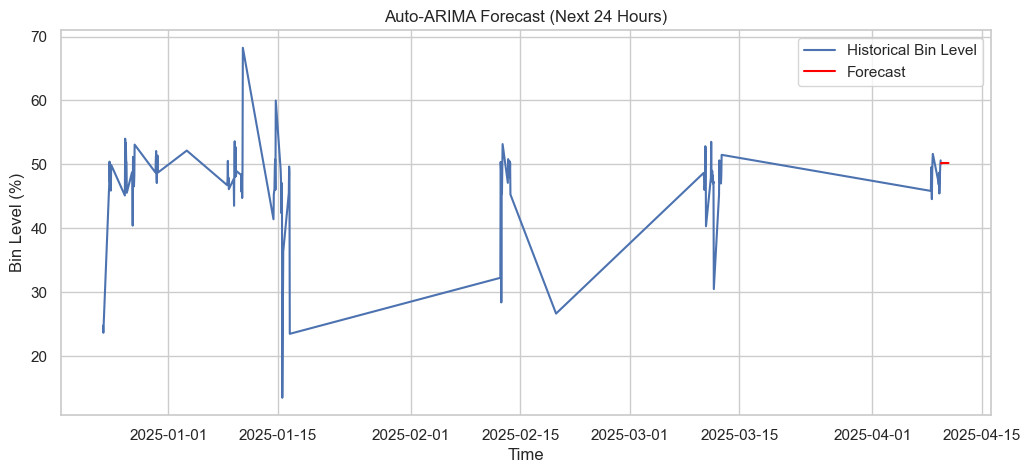

In [67]:
# Forecast the next 24 hours
n_periods = 24
forecast = stepwise_model.predict(n_periods=n_periods)

# Create datetime index for forecast
future_index = pd.date_range(start=ts_df.index[-1], periods=n_periods + 1, freq='h')[1:]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(ts_df['bin_level'], label='Historical Bin Level')
plt.plot(future_index, forecast, label='Forecast', color='red')
plt.title('Auto-ARIMA Forecast (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('Bin Level (%)')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import pmdarima as pm

# Fit auto_arima to your time series data
stepwise_model = pm.auto_arima(
    ts_df['bin_level'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,  # Automatically determine 'd'
    seasonal=False,  # No seasonality assumed
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Get the optimal order
optimal_order = stepwise_model.order
print(f"Optimal (p, d, q): {optimal_order}")


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9171.091, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9091.364, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9052.377, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9169.216, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9031.177, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8997.341, Time=0.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8995.824, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8997.447, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8997.798, Time=3.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8994.083, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9089.544, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=8995.701, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8995.595, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9029.449, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0]          

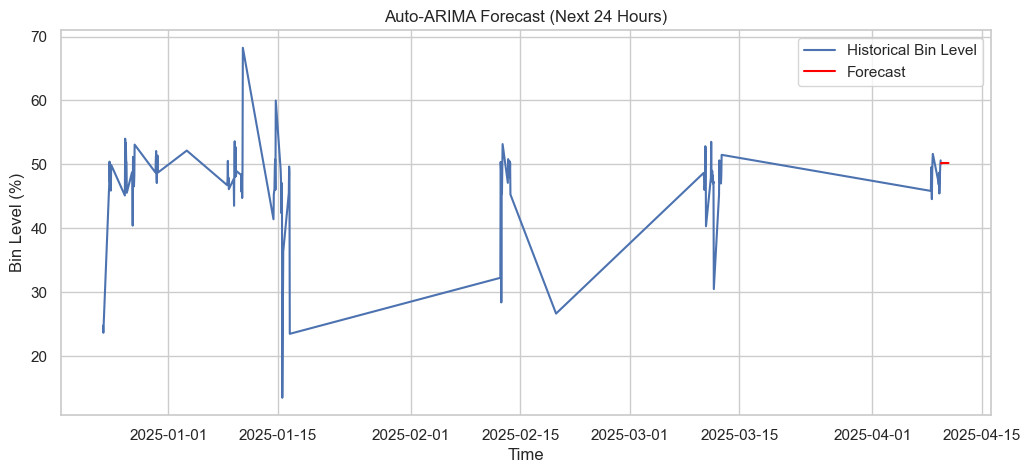

In [69]:
# Forecast the next 24 hours
n_periods = 24
forecast = stepwise_model.predict(n_periods=n_periods)

# Create datetime index for forecast
future_index = pd.date_range(start=ts_df.index[-1], periods=n_periods + 1, freq='h')[1:]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(ts_df['bin_level'], label='Historical Bin Level')
plt.plot(future_index, forecast, label='Forecast', color='red')
plt.title('Auto-ARIMA Forecast (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('Bin Level (%)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
import pandas as pd

# Load your CSV and parse dates
df = pd.read_csv("C:/Users/USER/Downloads/user-garbage_data_entity_202506101226.csv", parse_dates=['created_on'])


# Set datetime index
df.set_index('created_on', inplace=True)

# Keep only numeric columns (e.g., bin_level)
df_numeric = df.select_dtypes(include='number')

# Resample hourly and interpolate missing values
df_resampled = df_numeric.resample('h').mean().interpolate()


C:\Users\USER\AppData\Local\Temp\ipykernel_15068\764538443.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_numeric.resample('H').mean().interpolate()


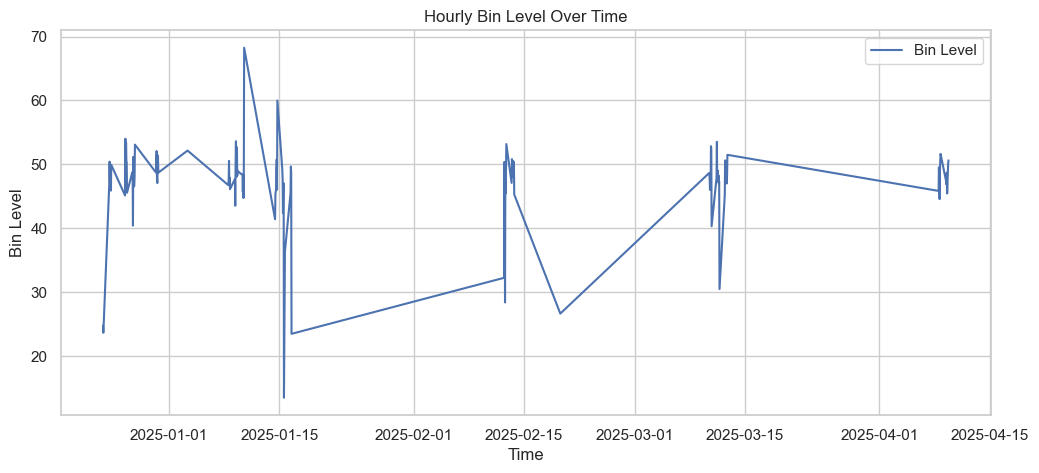

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=8991.538, Time=15.96 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=9171.091, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=9088.721, Time=2.43 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=9045.745, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=9169.216, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=8989.992, Time=10.24 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=8998.197, Time=1.47 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=8991.499, Time=90.64 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=8990.337, Time=9.27 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=8993.501, Time=93.26 sec
 ARIMA(1,1,2)(0,0,1)[24] intercept   : AIC=8991.822, Time=6.28 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=8988.501, Time=6.41 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=8997.341, Time=0.84 sec
 ARIMA(2,1,1)(1,0,1)[24] intercept   : AIC=8990.028, Time=9.88 sec
 ARIMA(2,1,1)(0

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Step 1: Load the data
df = pd.read_csv("C:/Users/USER/Downloads/user-garbage_data_entity_202506101226.csv", parse_dates=['created_on'])

# Step 2: Set datetime index
df.set_index('created_on', inplace=True)

# Step 3: Keep only numeric columns (for example, 'bin_level')
df_numeric = df.select_dtypes(include='number')

# Step 4: Resample to hourly data and interpolate
df_resampled = df_numeric.resample('H').mean().interpolate()

# Step 5: Extract the target series
ts = df_resampled['bin_level']

# Step 6: Plot original series
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Bin Level')
plt.title('Hourly Bin Level Over Time')
plt.xlabel('Time')
plt.ylabel('Bin Level')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Fit optimal SARIMA model
model_auto = auto_arima(ts, seasonal=True, m=24, stepwise=True, suppress_warnings=True, trace=True)
print("Best SARIMA order:", model_auto.order)
print("Best seasonal order:", model_auto.seasonal_order)

# Step 8: Fit SARIMA
model = SARIMAX(ts,
                order=model_auto.order,
                seasonal_order=model_auto.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Step 9: Forecast for 1 year (365 days * 24 hours = 8760 hours)
forecast_steps = 365 * 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 10: Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('1-Year Forecast of Bin Level')
plt.xlabel('Time')
plt.ylabel('Bin Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("bin_level_forecast_plot.png", dpi=300)
plt.close()
# Step 11: Save the forecast to CSV (optional for dashboard use)
forecast_df = forecast_mean.to_frame(name='forecast_bin_level')
forecast_df.to_csv("bin_level_1year_forecast.csv")


In [72]:
%matplotlib inline


C:\Users\USER\AppData\Local\Temp\ipykernel_15068\1944397186.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date, periods=100, freq='H')


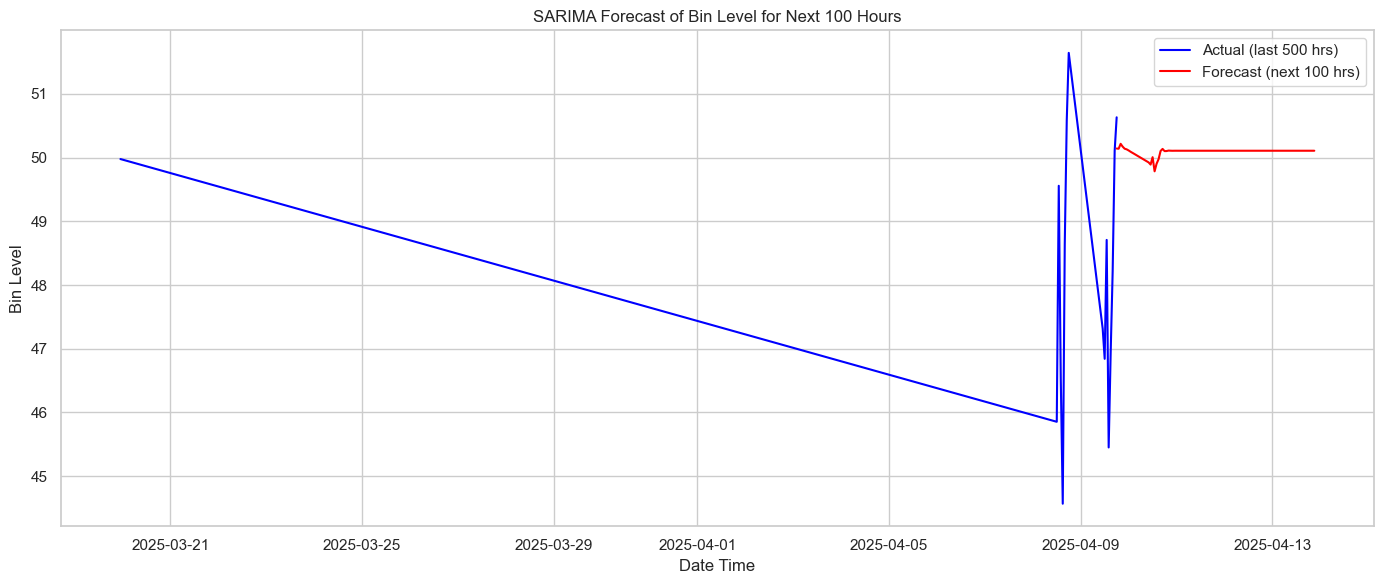

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generate a 100-step forecast using only the 'bin_level' column
model = SARIMAX(
    df_resampled['bin_level'],   # ✅ Use only the 'bin_level' column
    order=(2, 1, 0),
    seasonal_order=(0, 0, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit()

# Forecast next 100 steps (hours)
forecast = model_fit.forecast(steps=100)

# Generate corresponding datetime index for forecast
last_date = df_resampled.index[-1]
forecast_index = pd.date_range(start=last_date, periods=100, freq='H')

# ✅ Plot actual vs forecast
plt.figure(figsize=(14, 6))
plt.plot(df_resampled['bin_level'][-500:], label='Actual (last 500 hrs)', color='blue')
plt.plot(forecast_index, forecast, label='Forecast (next 100 hrs)', color='red')
plt.xlabel("Date Time")
plt.ylabel("Bin Level")
plt.title("SARIMA Forecast of Bin Level for Next 100 Hours")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [74]:
print(df.columns.tolist())


['id', 'application_id', 'battery_level', 'bin_level', 'data_publish_toiudx', 'date_time', 'device_addr', 'device_id', 'device_name', 'device_position', 'device_type', 'distance', 'latitude', 'longitude', 'position_state', 'source', 'temperature']


C:\Users\USER\AppData\Local\Temp\ipykernel_15068\1176662513.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df_resampled.index[-1] + pd.Timedelta(hours=1),


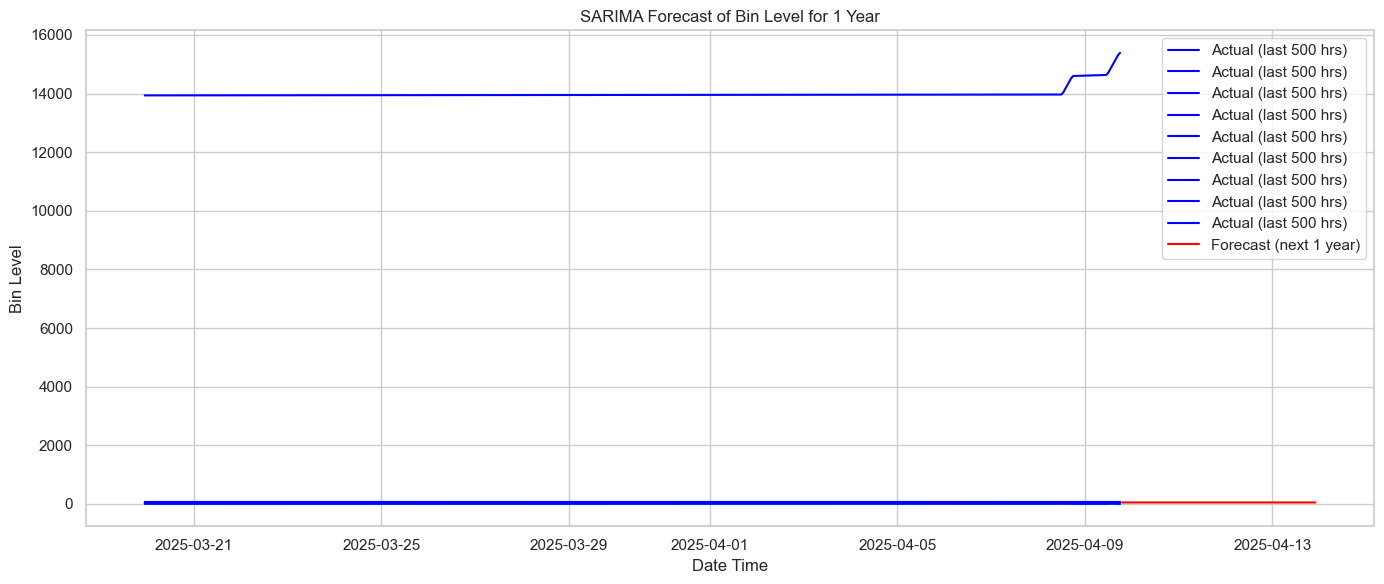

In [75]:
forecast_index = pd.date_range(start=df_resampled.index[-1] + pd.Timedelta(hours=1),
                               periods=len(forecast), freq='H')

plt.figure(figsize=(14, 6))
plt.plot(df_resampled[-500:], label='Actual (last 500 hrs)', color='blue')
plt.plot(forecast_index, forecast, label='Forecast (next 1 year)', color='red')
plt.xlabel("Date Time")
plt.ylabel("Bin Level")
plt.title("SARIMA Forecast of Bin Level for 1 Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# Last 30 days = 30 * 24 = 720 hours
train = df_resampled[:-720]
test = df_resampled[-720:]


In [77]:
model = SARIMAX(
    train,
    order=(2, 1, 0),
    seasonal_order=(0, 0, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit()


ValueError: SARIMAX models require univariate `endog`. Got shape (1851, 9).

In [ ]:
forecast = model_fit.forecast(steps=720)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")


MAE  (Mean Absolute Error):      4.52
MSE  (Mean Squared Error):       23.72
RMSE (Root Mean Squared Error):  4.87
MAPE (Mean Absolute % Error):    9.33%


In [ ]:
print(df['data_publish_toiudx'].unique()[:20])
print(df['data_publish_toiudx'].dtype)


[False True nan]
object


In [ ]:
print(df.columns.tolist())


['id', 'application_id', 'battery_level', 'bin_level', 'data_publish_toiudx', 'device_addr', 'device_id', 'device_name', 'device_position', 'device_type', 'distance', 'latitude', 'longitude', 'position_state', 'source', 'temperature']


In [ ]:
print(df.head())
print(df.dtypes)


                         id application_id  battery_level  bin_level  \
date_time                                                              
2024-12-23 16:24:52.319   1     lora-00001           52.0       12.0   
2024-12-23 16:25:52.155   2     lora-00001           52.0       22.0   
2024-12-23 16:26:33.177   3     lora-00001           52.0       17.0   
2024-12-23 16:32:11.188   4     lora-00001           52.0       18.0   
2024-12-23 16:33:11.109   5     lora-00001           52.0       22.0   

                        data_publish_toiudx device_addr         device_id  \
date_time                                                                   
2024-12-23 16:24:52.319               False    260BE023  70B3D57ED00698FC   
2024-12-23 16:25:52.155                True    260BE023  70B3D57ED00698FC   
2024-12-23 16:26:33.177                True    260BE023  70B3D57ED00698FC   
2024-12-23 16:32:11.188                True    260BE023  70B3D57ED00698FC   
2024-12-23 16:33:11.109          

In [ ]:
df.index = pd.to_datetime(df.index)


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ✅ Step 1: Assume df is already loaded and the datetime index is already set
# So we skip parsing date_time again

# ✅ Step 2: Resample and interpolate
df_hourly = df['bin_level'].resample('h').mean().interpolate()

# ✅ Step 3: Fit SARIMA model (adjust order if needed)
model = SARIMAX(df_hourly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit(disp=False)

# ✅ Step 4: Forecast next 100 hours
forecast_steps = 100
future_index = pd.date_range(start=df_hourly.index[-1] + pd.Timedelta(hours=1),
                             periods=forecast_steps, freq='h')
forecast = model_fit.forecast(steps=forecast_steps)

# ✅ Step 5: Save both historical and forecasted data
df_forecast = pd.DataFrame({
    'datetime': future_index,
    'forecasted_bin_level': forecast
})
df_forecast.set_index('datetime', inplace=True)

# Combine historical and forecast
df_combined = pd.concat([df_hourly.rename("actual_bin_level"), df_forecast], axis=1)

# ✅ Step 6: Save to CSV
df_combined.to_csv("bin_level_forecast.csv")

print("✅ Forecast saved as 'bin_level_forecast.csv'. You can now load it into Power BI.")


✅ Forecast saved as 'bin_level_forecast.csv'. You can now load it into Power BI.
